In [1]:
import tensorflow as tf
import keras as keras

In [3]:
print("tensorflow:", tf.__version__)
print("keras:", keras.__version__)

tensorflow: 2.13.0
keras: 2.13.1


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [46]:
pip install pandas

   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------- ----------------------- 4.7/11.5 MB 23.7 MB/s eta 0:00:01
   ---------------------------------- ----- 10.0/11.5 MB 24.8 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 24.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Keras 

Keras is a deep-learning framework for Python that is a model-level library, providing high-level building blocks for developing deep-learning models.

Keras has the following key features:
* It allows the same code to run seamlessly on CPU or GPU.
* It has a user-friendly Application Programming Interface (API) that makes it easy to quickly prototype deep-learning models.
* It has built-in support for convolutional networks (for computer vision), recurrent networks (for sequence processing), and any combination of both.

# ANN for image classification

## STEPS

* #1 - Load in the data
  * MNIST dataset
  * 10 digits (0 to 9)
  * Already included in Tensorflow
 
* #2 Build the model
  * Sequential dense layers ending with multiclass logistic regression
 
* #3 Train the model

* #4 Evaluate th emodel

* #5 Make predictions

## Using MNIST dataset

In [4]:
# Example: MNIST (the National Institute of Standards and Technology) dataset
# This dataset is standard machine learning benchmark of handwritten digits.
import tensorflow as tf
import keras as keras

from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
print(train_images.shape) # Nx28x28
print(train_labels.shape) # N

(60000, 28, 28)
(60000,)


In [6]:
print(test_images.shape) # Nx28x28
print(test_labels.shape) # N

(10000, 28, 28)
(10000,)


The problem we’re trying to solve here is to classify grayscale images of handwritten digits (28 × 28 = 784 pixels, grayscale) into their 10 categories (0 through 9). We’ll use the MNIST dataset, a classic in the machine-learning community, which has been around almost as long as the field itself and has been intensively studied. It’s a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s.

The images are encoded as Numpy arrays, and the labels are an array of digits, ranging from 0 to 9.

In [7]:
print(train_images.ndim) # 3D tensor 
print(train_images.shape) # an array of 60,000 matrices of 28 × 28 integers
print(train_images.dtype) # a 3D tensor of 8-bit integers; Each such matrix is a grayscale image, with coefficients between 0 and 255.
print(len(train_labels))
train_labels

3
(60000, 28, 28)
uint8
60000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

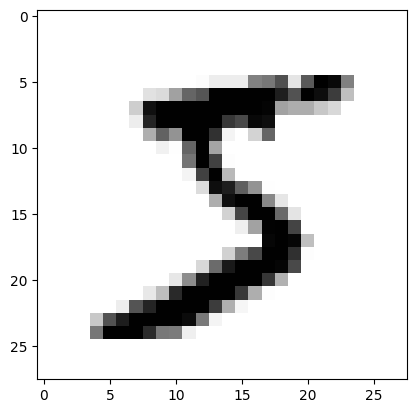

In [8]:
# Displaying 4th digit in this 3D tensor
digit = train_images[0] # select a specific digit: sample 0 to 
#print(digit)  

import matplotlib.pyplot as plt # you need to install matplotlib like "conda install matplotlib"
plt.imshow(digit, cmap=plt.cm.binary) # cm: color map to binary (black 0 and white 1)
plt.show()

In [9]:
# Manipulating tensors in Numpy
# Selecting specific elements in a tensor is called `tensor slicing`.
# selects digits #10 to #100 (#100 isn’t included) and puts them in an array of shape (90, 28, 28):
my_slice = train_images[10:100]
print(my_slice.shape)

(90, 28, 28)


In [10]:
# It’s equivalent to this more detailed notation
my_slice = train_images[10:100, :, :]
print(my_slice.shape)

(90, 28, 28)


In [11]:
# data batches
# break the data into small batches; 
# batch size of 128

n = 2; # n is an integer
batch = train_images[128*n:128*(n+1)]
batch.shape

(128, 28, 28)

### Why Use Batches?
* Memory Efficiency: Instead of loading the entire dataset into memory at once, which may not be feasible for large datasets, training with smaller batches helps conserve memory.

* Faster Training: Updating the model after every batch instead of the entire dataset allows for faster updates and quicker convergence during training.

* Improved Generalization: Using batches introduces some stochasticity (randomness) in the training process, which can help prevent overfitting and improve the model's generalization to unseen data.

* Parallelization: Batches can be processed in parallel, leveraging modern hardware (GPUs/TPUs), making training more efficient.


In [12]:
train_images, test_images = train_images/255.0, test_images /255.0 # normalize to the range [0, 1]

print("train_images.shape:",train_images.shape) 
print("test_images.shape:",test_images.shape) 


train_images.shape: (60000, 28, 28)
test_images.shape: (10000, 28, 28)


In [13]:
# Build the model
# inside the brackets [], define the layers of the model.
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28)),
    tf.keras.layers.Flatten(), # This is necessary to make into 1D input for input layer
    tf.keras.layers.Dense(512, activation='relu'), # hidden layer with 512 neurons
    tf.keras.layers.Dropout(.2), # regularization technique
    # It randomly sets 20% (as specified by the 0.2) of the input neurons to zero during training.
    tf.keras.layers.Dense(10, activation='softmax') # 10 output; predicting digits 0-9 in MNIST
])

#### `tf.keras.layers.Flatten`:
* Flatten is a Keras layer that takes a multi-dimensional input (like a 2D image) and flattens it into a 1D vector.
* In this case, the input to the model is a 28x28 grayscale pixel image, which has a shape of (28, 28).
#### `input_shape=(28, 28)`:
* The Flatten layer will convert each input image from a 2D array with shape (28, 28) into a 1D array of size 28 * 28 = 784. 

In [14]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy', # when the true labels are integers instead of one-hot encoded vectors.
              # when the true labels are one-hot encoded, use `categorical_crossentropy`
              metrics=['accuracy'])

##  `optimizer='adam':`

* Adam (Adaptive Moment Estimation) is an optimization algorithm that combines the advantages of two other optimizers:
  -  RMSProp: Which adjusts the learning rate based on recent gradients.
  - Momentum: Which helps smooth the optimization by considering previous updates.

## `loss='sparse_categorical_crossentropy':`

* The loss function measures how far off the model's predictions are from the true labels.
* `sparse_categorical_crossentropy` is used when you're performing multi-class classification and your target labels are integers (e.g., 0, 1, 2,...), rather than one-hot encoded vectors.
* It's a variation of categorical crossentropy but is used when the labels are provided as sparse integers (like class indices).
    - Example: For digit classification, your labels might be 0 for the digit "0", 1 for the digit "1", and so on up to 9.
* It calculates the difference between the predicted probability distribution (from the model) and the actual label in a way that encourages the model to predict the correct class with high confidence.

In [15]:
r = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2215 - accuracy: 0.9349 - val_loss: 0.1029 - val_accuracy: 0.9698
Epoch 2/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0972 - accuracy: 0.9697 - val_loss: 0.0744 - val_accuracy: 0.9762
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0678 - accuracy: 0.9784 - val_loss: 0.0710 - val_accuracy: 0.9774
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0526 - accuracy: 0.9836 - val_loss: 0.0688 - val_accuracy: 0.9804
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0434 - accuracy: 0.9858 - val_loss: 0.0747 - val_accuracy: 0.9772
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0362 - accuracy: 0.9880 - val_loss: 0.0688 - val_accuracy: 0.9803
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0319 - accuracy: 0.9894 - val_loss: 0.0672 - val_accuracy:

#### Why 1875 Batches?
* The `1875/1875` in the output refers to the number of batches processed during each epoch of training.

* If you're using the MNIST dataset (which has 60,000 training images) and a default batch size of 32, then the total number of batches is calculated as:

$$Total Batches
=
60,000/32
=
1875$$

Each batch processes 32 images, and after processing 1875 batches, all 60,000 images are processed once (i.e., completing one epoch).

In [16]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


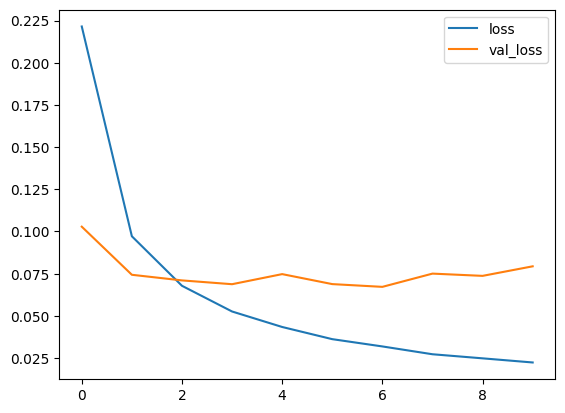

In [17]:
# Plot loss per iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

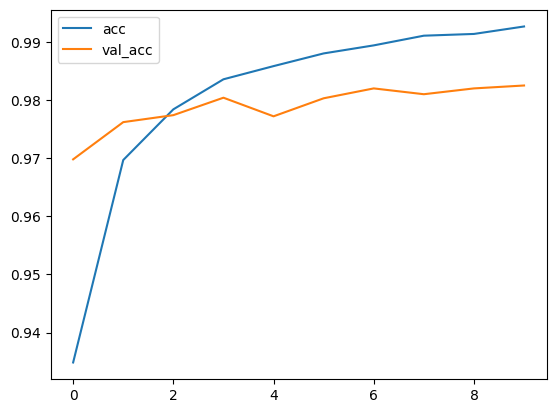

In [18]:
# plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [19]:
# Evaluate the model
print(model.evaluate(test_images, test_labels))

313/313 [==============================] - 0s 722us/step - loss: 0.0794 - accuracy: 0.9825
[0.07936742156744003, 0.9825000166893005]


## Confusiton matrix

In [20]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [26]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [27]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    #---
    # cm: the confusion matrix (a 2D array) 
    # classes: A list or array of class labels (e.g., ['cat', 'dog']), which are used to label the axes of the confusion matrix.
    # title: title of the confusion matrix plot
    # cmap: the colormap for the confusion matrix plot, which will color the matrix using shades of blue.
    
    #This function prints and plots the confusion matrix.
    #Normalization can be applied by setting 'normalize=True'.
    #---

    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis] # normalized to display proportions rather than raw counts
        # `cm.astype('float')` type conversion to flaot for obtaining fractional values
        # `cm.sum(axis=1)`: row-wise summation (in confusion matrix, each row represents the true class, and each column represents the predicted class
        #                   thus, this calculate the total number of occurrences (true labels) for each class.
        # `[:, np.newaxis]`: np.newaxis is used to add a new axis to the array.
        #                    In this case, it's turning the 1D array from cm.sum(axis=1) into a column vector 
        print("Normalized confusion matrix (proportion)")
    else:
        print("Confuusion matrix, without normalizaiton")

    print(cm)

    # Plotting the confusion matrix using a heatmap
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # interpolation='nearest': This controls how pixel values are interpolated. 
    # Using 'nearest' means that the matrix is displayed without smoothing, so each cell in the matrix will be represented as a solid block of color.
    # cmap is the colormap used to color the cells of the confusion matrix. 
    plt.title(title) 
    plt.colorbar() # his adds a color bar next to the plot, indicating the color scale used in the heatmap. 
    tick_marks = np.arange(len(classes)) # np.arange(len(classes)) generates an array of tick positions (integers) from 0 to len(classes) - 1.
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Formatting the matrix values to show in the heatmap
    fmt = '.2f' if normalize else 'd' # If confusion matrix is normalized then use floating-point numbers with 2 decimal places
                                      # Otherwise, just use integers
    thresh = cm.max() / 2. # `thresh` sets a threshold to determine how to color the text inside the cells of the confusion matrix.
                           # cm.max(): This finds the maximum value in the confusion matrix. This could be the highest count or the highest proportion
                           # This means that for any cell with a value greater than `thresh`, the text will be white
                           # for any cell with a value less than or equal to `thresh`, the text will be black.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

313/313 [==============================] - 0s 658us/step
[[ 972    1    1    0    1    1    1    1    2    0]
 [   0 1128    1    1    0    0    2    1    1    1]
 [   2    2 1013    4    1    0    2    2    5    1]
 [   0    0    1  988    0   11    0    2    1    7]
 [   1    0    4    0  961    0    4    3    1    8]
 [   2    0    0    4    1  883    0    0    1    1]
 [   2    3    1    1    3    8  939    0    1    0]
 [   0    2    9    2    0    0    0 1009    1    5]
 [   1    0    4    8    4    6    0    3  941    7]
 [   1    2    2    1    4    4    0    4    0  991]]
Normalized confusion matrix (proportion)
[[9.91836735e-01 1.02040816e-03 1.02040816e-03 0.00000000e+00
  1.02040816e-03 1.02040816e-03 1.02040816e-03 1.02040816e-03
  2.04081633e-03 0.00000000e+00]
 [0.00000000e+00 9.93832599e-01 8.81057269e-04 8.81057269e-04
  0.00000000e+00 0.00000000e+00 1.76211454e-03 8.81057269e-04
  8.81057269e-04 8.81057269e-04]
 [1.93798450e-03 1.93798450e-03 9.81589147e-01 3.87596899

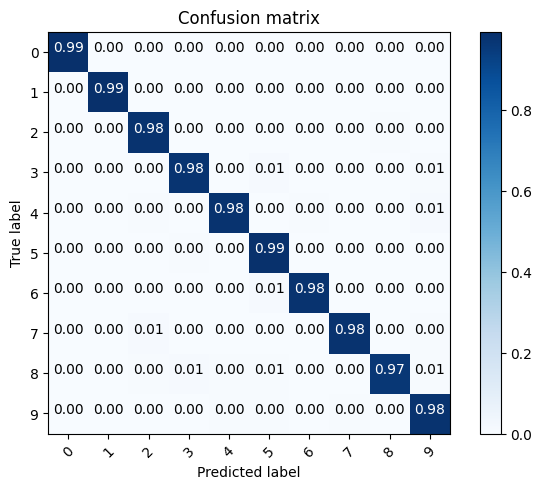

In [32]:
p_test = model.predict(test_images).argmax(axis=1)
# `argmax(axis=1)` returns the index (category) of the maximum value along the specified axis.cm = confusion_matrix(test_labels, p_test)
print(cm)
plot_confusion_matrix(cm, list(range(10)), normalize=True)


[  96  115  149  217  247  321  340  445  447  495  543  582  659  684
  691  720  740  810  844  882  938  947  951 1014 1039 1101 1112 1156
 1178 1181 1182 1226 1242 1247 1260 1319 1328 1393 1395 1522 1530 1549
 1609 1681 1686 1790 1800 1878 1901 1982 2004 2024 2053 2109 2135 2182
 2293 2387 2422 2462 2488 2534 2582 2597 2598 2607 2648 2654 2721 2877
 2921 2939 2953 3012 3023 3060 3073 3117 3218 3289 3422 3490 3503 3520
 3558 3727 3751 3780 3808 3818 3853 3893 3941 3943 4065 4075 4078 4156
 4163 4176 4199 4201 4248 4289 4369 4380 4433 4437 4497 4536 4571 4578
 4635 4639 4740 4751 4807 4814 4823 4880 4956 5046 5331 5495 5623 5634
 5642 5676 5734 5749 5757 5936 5955 5973 6004 6011 6023 6024 6059 6532
 6555 6574 6597 6625 6651 6755 6783 7107 7434 7921 8059 8094 8246 8277
 8325 8362 8527 9009 9015 9019 9024 9280 9316 9587 9634 9679 9692 9700
 9735 9745 9768 9770 9792 9839 9944]


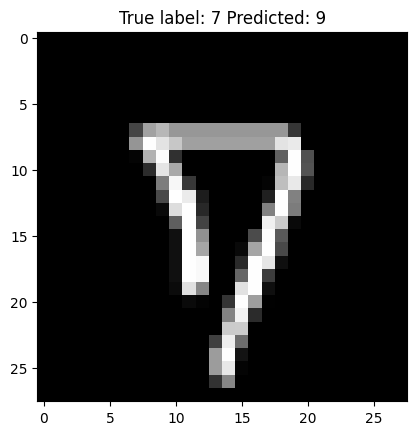

In [33]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != test_labels)[0]
print(misclassified_idx)

i = np.random.choice(misclassified_idx)
plt.imshow(test_images[i], cmap='gray')
plt.title("True label: %s Predicted: %s" %(test_labels[i], p_test[i])); # semi-colon is used to suppress any unnecessary extra output displayed
# in %(test_labels[i], p_test[i]), % is an operator to tell Python to substitue the values into the placeholders in the string

## ANN Regression

In [34]:
from mpl_toolkits.mplot3d import Axes3D  # for 3D plotting

In [35]:
# make the dataset (synthetic data)
N = 1000
X = np.random.random((N,2))*6 - 3 # To generate 2D data points uniformly distributed between (-3, 3) from uniform(0, 1)
Y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1])
print(X.shape)
print(Y.shape)

(1000, 2)
(1000,)


* This implenets the function:
$$ y = cos(2x_1) + cos(3x_2)$$

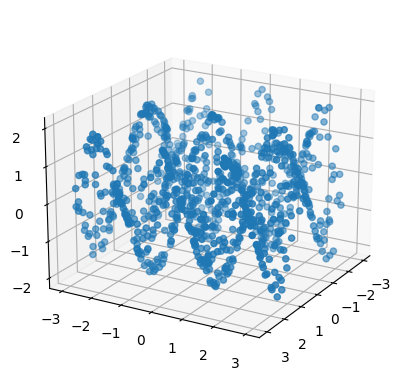

In [41]:
# plot it
fig = plt.figure() # create an empty figure
ax = fig.add_subplot(111, projection ='3d') # add 3 d plot to an existing figure object (fig)
# 111 is shorthand notation that tells Matplotlib to create a grid of subplots with 1 row, 1 column (final subplot of 1x1 grid)
ax.scatter(X[:,0], X[:,1], Y)

# Rotate the 3D plot by setting the elevation and azimuth angles
ax.view_init(elev=20, azim=30)  # adjust elev and azim as needed

plt.show()

In [43]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'), # one hidden layer with 128 neurons
    tf.keras.layers.Dense(1) # due to regression, we do not need activation function here
])


In [44]:
# Compile and fit
opt = tf.keras.optimizers.Adam(.01) # Adam (Adaptive Moment Estimation) optimizer with a specified learning rate of .01
# Adam combines the benefits of two popular optimizers
# * Momentum: Helps accelerate gradient descent by considering the previous gradients to smooth the update steps.
# * RMSProp: Adjusts the learning rate based on recent gradient magnitudes to help maintain a good learning speed.
model.compile(optimizer=opt, loss='mse')
r = model.fit(X,Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 466us/step - loss: 1.0508
Epoch 2/100
32/32 [==============================] - 0s 469us/step - loss: 0.9790
Epoch 3/100
32/32 [==============================] - 0s 452us/step - loss: 0.9497
Epoch 4/100
32/32 [==============================] - 0s 431us/step - loss: 0.9374
Epoch 5/100
32/32 [==============================] - 0s 468us/step - loss: 0.8927
Epoch 6/100
32/32 [==============================] - 0s 442us/step - loss: 0.8739
Epoch 7/100
32/32 [==============================] - 0s 468us/step - loss: 0.7749
Epoch 8/100
32/32 [==============================] - 0s 460us/step - loss: 0.7605
Epoch 9/100
32/32 [==============================] - 0s 469us/step - loss: 0.6712
Epoch 10/100
32/32 [==============================] - 0s 455us/step - loss: 0.6683
Epoch 11/100
32/32 [==============================] - 0s 620us/step - loss: 0.5765
Epoch 12/100
32/32 [==============================] - 0s 475us/step - loss: 0.5583
Epoch 13/100


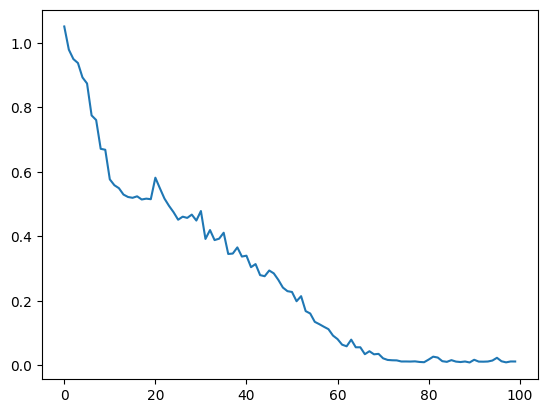

In [45]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

(50, 50)
(50, 50)
(2500, 2)
79/79 [==============================] - 0s 353us/step
(2500,)


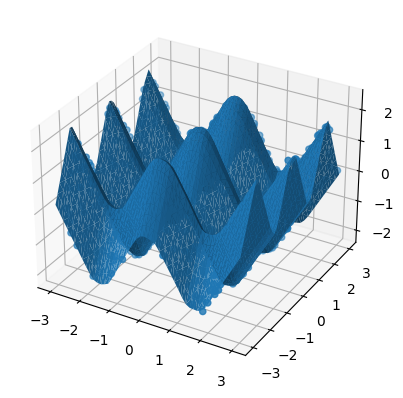

In [50]:
# Plot the prediction surface

# Plot the data first
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot
line = np.linspace(-3, 3, 50) # 50 evenly spaced points between (-3, 3) -> 1d array of shape (50,)
xx, yy = np.meshgrid(line, line) # cross product between these two sets of points; every x1 and every x2 are paired each other
print(xx.shape)
print(yy.shape)

# Since input expects N by 2 array
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T # Stacks these two flattened arrays vertically, then transpose the results
# After flatten, xx.flatten() shape becomes (2500,) and the same as yy.flatten
# after vstack these two 1D arrrays, it becomes (2, 2500)
# after transpose the shape is (2500,2)
print(Xgrid.shape)

Yhat = model.predict(Xgrid).flatten()
# Steps = Total number of samples / Batch size
# Steps = 2500 / 32 ≈ 78.125 -> TensorFlow will round up to ensure that all samples are processed, resulting in 79 steps.

print(Yhat.shape)

# 3D triangular surface plot: allows you to visualize data that is unevenly distributed 
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=.2, antialiased = True) # antialiased = True ensures that the surface plot has smoother lines
plt.show()

## 3.4 Classifying movie reviews: a binary classification example

In this example, you’ll learn to classify movie reviews as positive or negative, based on the text content of the reviews.

### 3.4.1 The IMDB dataset
* a set of 50,000 highly polarized reviews from the Internet Movie Database.
* They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.
* The IMDB dataset comes packaged with Keras.
* It has already been preprocessed:
  - the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary.

In [4]:
# Loading the IMDB dataset (~ 80 MB of data)
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# only keep the top 10,000 most frequently occurring words in the training data; Rare words will be discarded.
# train_data and test_data are lists of reviews where each review is a list of word indices (encoding a sequence of words).
# train_labels and test_labels are lists of 0s and 1s, where 0 stands for negative and 1 stands for positive

17464789/17464789 [==============================] - 1s 0us/step


In [60]:
print(train_data[24999]) # print 0 to 24999
print(train_data.shape)
print(train_labels[24999])
print(train_labels.shape)

[1, 17, 6, 194, 337, 7, 4, 204, 22, 45, 254, 8, 106, 14, 123, 4, 2, 270, 2, 5, 2, 2, 732, 2098, 101, 405, 39, 14, 1034, 4, 1310, 9, 115, 50, 305, 12, 47, 4, 168, 5, 235, 7, 38, 111, 699, 102, 7, 4, 4039, 9245, 9, 24, 6, 78, 1099, 17, 2345, 2, 21, 27, 9685, 6139, 5, 2, 1603, 92, 1183, 4, 1310, 7, 4, 204, 42, 97, 90, 35, 221, 109, 29, 127, 27, 118, 8, 97, 12, 157, 21, 6789, 2, 9, 6, 66, 78, 1099, 4, 631, 1191, 5, 2642, 272, 191, 1070, 6, 7585, 8, 2197, 2, 2, 544, 5, 383, 1271, 848, 1468, 2, 497, 2, 8, 1597, 8778, 2, 21, 60, 27, 239, 9, 43, 8368, 209, 405, 10, 10, 12, 764, 40, 4, 248, 20, 12, 16, 5, 174, 1791, 72, 7, 51, 6, 1739, 22, 4, 204, 131, 9]
(25000,)
0
(25000,)


### 3.4.2 Preparing the data
You can’t feed lists of integers into a neural network. You have to turn your lists into tensors (multi-dimensional numerical arrays).

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # Creates an all-zero matrix of shape
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # Set specific indices of results[i] to 1s
    return results

* Example to use `vectorize_squences` function

In [62]:
# Example sequences (each sequence is a list of word indices)
sequences = [
    [1, 3, 5],    # first sequence
    [0, 2, 3],    # second sequence
    [2, 4]        # third sequence
]

# Vectorizing the example sequences
vectorized_data = vectorize_sequences(sequences, dimension=6)  # Using 6 as the dimension (small for example purposes)

print(vectorized_data)

[[0. 1. 0. 1. 0. 1.]
 [1. 0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 1. 0.]]


In [6]:
# Vectorize training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(x_train[24999])
print(x_train.shape)

# also vectorize your labels (convert into a NumPy array)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(y_train[24999])
print(y_test[24999])

[0. 1. 1. ... 0. 0. 0.]
(25000, 10000)
0.0
0.0


### 3.4.3 Building your network
The input data is vectors, and the labels are scalars (1s and 0s): this is the easiest setup
you’ll ever encounter. A type of network that performs well on such a problem is
a simple stack of fully connected (Dense) layers with relu activations: Dense(16, activation='relu').
The argument being passed to each Dense layer (16) is the number of hidden units of the layer.
each such Dense layer with a relu activation implements the following chain of tensor operations:
*    output = relu(dot(W, input) + b)
Having 16 hidden units means the weight matrix W will have shape (input_dimension, 16): 
the dot product with W will project the input data onto a 16-dimensional representation space 
(and then you’ll add the bias vector b and apply the relu operation).
Having more hidden units (a higher-dimensional representation space) allows your network to learn more-complex representations, 
but it makes the network more computationally expensive and may lead to learning unwanted patterns 
(patterns that will improve performance on the training data but not on the test data).

There are two key architecture decisions to be made about such a stack of Dense layers:
* How many layers to use
* How many hidden units to choose for each layer

For now, we will assume that
* Two intermediate layers with 16 hidden units each
* A third layer that will output the scalar prediction regarding the sentiment of the current review

The intermediate layers will use relu as their activation function, and the final layer will use a sigmoid activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target “1”: how likely the review is to be positive).

The three-layer network is
* input -> Dense (units = 16) -> Dense (Units = 16) -> Dense (Units = 1) -> Output

In [7]:
# Keras model implementation
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Finally, you need to choose a loss function and an optimizer. Because you’re facing a
binary classification problem and the output of your network is a probability (you end
your network with a single-unit layer with a sigmoid activation), it’s best to use the *binary_crossentropy* loss.
crossentropy is usually the best choice when you’re dealing with models that output probabilities.
Crossentropy is a quantity from the field of Information Theory that measures the distance between probability distributions or, in this
case, between the ground-truth distribution and your predictions.

In [8]:
# Compiling the model by configuring the optimizer
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 3.4.4 Validating your approach

* Create a validation set by setting apart 10,000 samples from the original training data.

In [11]:
# Setting aside a validation data
x_val = x_train[:10000] #  takes the first 10,000 rows from x_train
print(x_train.shape)
print(x_val.shape)

partial_x_train = x_train[10000:]
print(partial_x_train.shape)

y_val = y_train[:10000]
partial_y_train = y_train[10000:]
print(y_val.shape)
print(partial_y_train.shape)

(25000, 10000)
(10000, 10000)
(15000, 10000)
(10000,)
(15000,)


* train the model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples. At the same time, monitor loss and accuracy on the 10,000 samples that you set apart. You do so by passing the validation data as the validation_data argument.

In [12]:
# Training the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512, # batch size can be chosen for any power of 2
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 33ms/step - loss: 0.5856 - acc: 0.7233 - val_loss: 0.4775 - val_acc: 0.8413
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3938 - acc: 0.8796 - val_loss: 0.3657 - val_acc: 0.8675
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2863 - acc: 0.9127 - val_loss: 0.3048 - val_acc: 0.8853
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.2269 - acc: 0.9287 - val_loss: 0.2821 - val_acc: 0.8872
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1856 - acc: 0.9423 - val_loss: 0.2783 - val_acc: 0.8874
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1565 - acc: 0.9522 - val_loss: 0.3152 - val_acc: 0.8747
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1333 - acc: 0.9591 - val_loss: 0.2856 - val_acc: 0.8852
Epoch 8/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1146 - a

In [14]:
# Let's make a dictionary containing data about everything that happened during training
history_dict = history.history
history_dict.keys()
# The dictionary contains four entries: one per metric that was being monitored during training and during validation.

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [16]:
pip install matplotlib

   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   ------------ --------------------------- 2.4/7.5 MB 12.2 MB/s eta 0:00:01
   -------------------------- ------------- 5.0/7.5 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------  7.3/7.5 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------- 7.5/7.5 MB 11.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 11.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ------------------------------------ --- 2.4/2.6 MB 12.2 MB/s eta 0:00:01
   ---------------------------------------- 2.6/2.6 MB 11.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


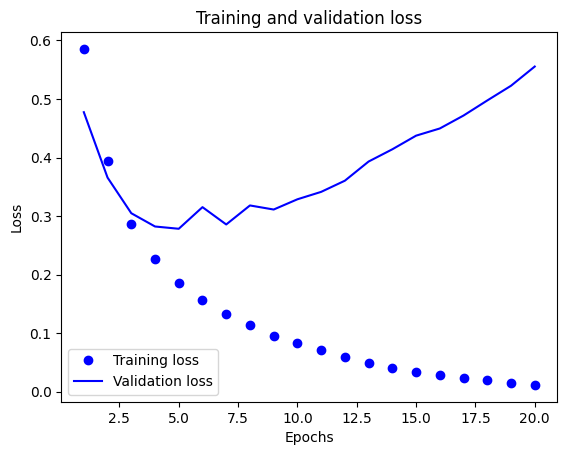

In [19]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss') # 'bo' means blue dot
plt.plot(epochs, val_loss_values, 'b', label='Validation loss') # 'b' means solid blue line

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

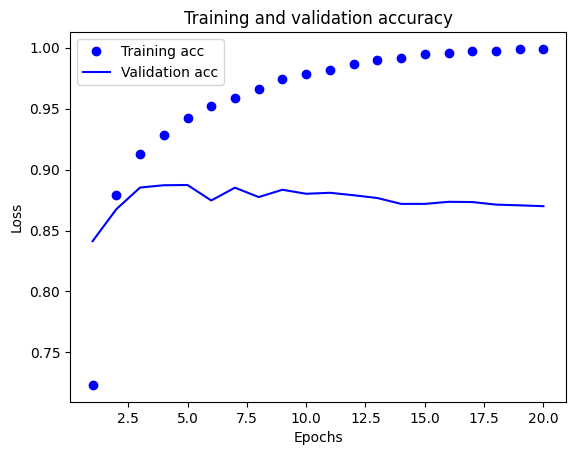

In [22]:
# Plotting the training and validation accuracy
plt.clf() # clear the figure

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

* It seems there is an overfitting problem.  To prevent overfitting, you could stop training after 5 epochs

In [70]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512) # batch size can be chosen for any power of 2

results = model.evaluate(x_test, y_test)

print(results)

Epoch 1/5
49/49 [==============================] - 1s 6ms/step - loss: 0.4769 - accuracy: 0.8199
Epoch 2/5
49/49 [==============================] - 0s 7ms/step - loss: 0.2863 - accuracy: 0.9027
Epoch 3/5
49/49 [==============================] - 0s 6ms/step - loss: 0.2229 - accuracy: 0.9214
Epoch 4/5
49/49 [==============================] - 0s 6ms/step - loss: 0.1872 - accuracy: 0.9334
Epoch 5/5
782/782 [==============================] - 1s 786us/step - loss: 0.2987 - accuracy: 0.8825
[0.2987391948699951, 0.8825200200080872]


## 3.5 Classifying newswires: a multiclass classification example

* Build a network to classify Reuters newswires into 46 mutually exclusive topics.
* Because each data point should be classified into only one category, the problem is an instance of single-label, multiclass classification.

### 3.5.1 The Reuters dataset
* consists of a set of short newswires and their topics, published by Reuters in 1986.
* It’s a simple, widely used toy dataset for text classification.
* There are 46 different topics; some topics are more represented than others, but each topic has at least 10 examples in the training set.
* It comes packaged as part of Keras.

In [71]:
# Loading the Reuters dataset
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
# the argument num_words=10000 restricts the data to the 10,000 most frequently occurring words found in the data.

print(train_data.shape) # 8,982 training examples
print(train_labels.shape)

print(test_data.shape) # 2,246 test examples
print(test_labels.shape)

2110848/2110848 [==============================] - 0s 0us/step
(8982,)
(8982,)
(2246,)
(2246,)


In [81]:
train_data[11] # each example is a list of integers (word indices)
print(len(train_data[10])) # each train_data example has a different length

train_labels[11]

31


3

In [83]:
# Encoding the data (The same function as before)
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) # Creates an all-zero matrix of shape
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # Set specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
print(x_train.shape)
print(x_test.shape)

(8982, 10000)
(2246, 10000)


### 3.5.3 Building the network

* Since we have 46 different classes, we need to increase the number of neurons in hidden layers. Let's go with 64 units

In [84]:
# model definition
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) # output layer has 46 units for 46 different classes

In [85]:
# Compiling the model
model.compile(optimizer='rmsprop', # rmsprop can adjust the learning rate for each parameter individually, 
              # but SGD has a fixed learning rate that can have slow convergence
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 3.5.4 Validating your approach

* Let’s set apart 1,000 samples in the training data to use as a validation set.

In [86]:
# Setting aside a validation set (See Below block #88)

# For labels, as similar as before
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension)) # Creates an all-zero matrix of shape
    for i, label in enumerate(labels):
        results[i, label] = 1. # Set specific indices of results[i] to 1s
    return results

one_hot_train_labels = to_one_hot(train_labels) # vectorize training labels
one_hot_test_labels = to_one_hot(test_labels)

print(train_labels.shape)
print(one_hot_train_labels.shape)

print(test_labels.shape)
print(one_hot_test_labels.shape)

(8982,)
(8982, 46)
(2246,)
(2246, 46)


In [88]:
# If you are using a built-in way to do this in Keras
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print(train_labels.shape)
print(one_hot_train_labels.shape)

print(test_labels.shape)
print(one_hot_test_labels.shape)

(8982,)
(8982, 46)
(2246,)
(2246, 46)


In [89]:
# Let’s set apart 1,000 samples in the training data to use as a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [90]:
# Now, let’s train the network for 20 epochs
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 26ms/step - loss: 2.7549 - accuracy: 0.4896 - val_loss: 1.8626 - val_accuracy: 0.5900
Epoch 2/20
16/16 [==============================] - 0s 15ms/step - loss: 1.5530 - accuracy: 0.6691 - val_loss: 1.4118 - val_accuracy: 0.6760
Epoch 3/20
16/16 [==============================] - 0s 15ms/step - loss: 1.1922 - accuracy: 0.7437 - val_loss: 1.2042 - val_accuracy: 0.7370
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.9801 - accuracy: 0.7914 - val_loss: 1.0901 - val_accuracy: 0.7720
Epoch 5/20
16/16 [==============================] - 0s 14ms/step - loss: 0.8217 - accuracy: 0.8254 - val_loss: 1.0199 - val_accuracy: 0.7850
Epoch 6/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6896 - accuracy: 0.8533 - val_loss: 0.9509 - val_accuracy: 0.7930
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.5843 - accuracy: 0.8756 - val_loss: 0.9228 - val_accuracy: 0.7980
Epoch 8/20
16

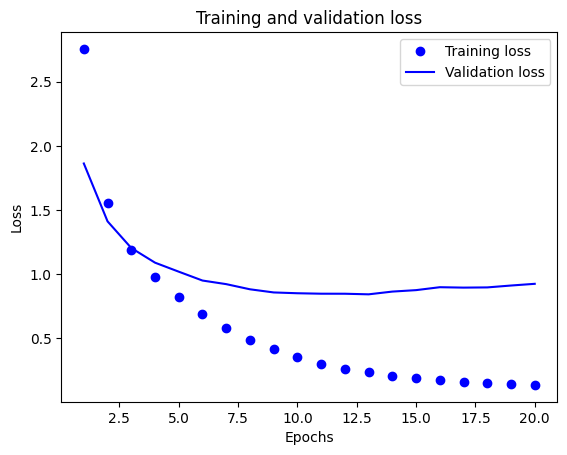

In [91]:
# let’s display its loss and accuracy curves
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

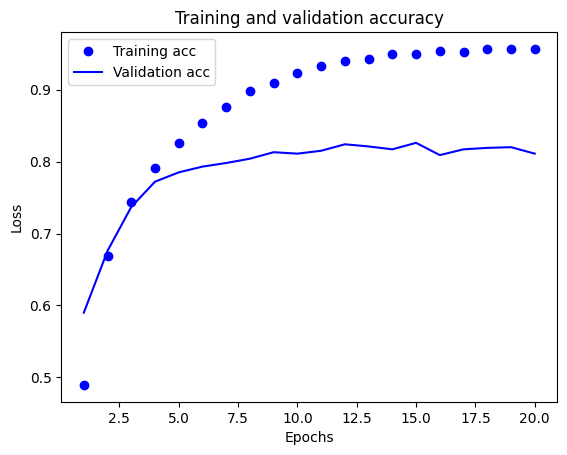

In [94]:
# Plotting the training and validation accuracy
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

* The network begins to overfit after 10 epochs. Let’s train a new network from 
scratch for10e epochs and then evaluate it on the test set
.

In [95]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=10,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/10
16/16 [==============================] - 0s 19ms/step - loss: 2.6937 - accuracy: 0.4936 - val_loss: 1.8380 - val_accuracy: 0.5960
Epoch 2/10
16/16 [==============================] - 0s 12ms/step - loss: 1.5600 - accuracy: 0.6670 - val_loss: 1.3957 - val_accuracy: 0.6850
Epoch 3/10
16/16 [==============================] - 0s 12ms/step - loss: 1.1985 - accuracy: 0.7389 - val_loss: 1.1978 - val_accuracy: 0.7420
Epoch 4/10
16/16 [==============================] - 0s 12ms/step - loss: 0.9809 - accuracy: 0.7893 - val_loss: 1.0905 - val_accuracy: 0.7610
Epoch 5/10
16/16 [==============================] - 0s 12ms/step - loss: 0.8161 - accuracy: 0.8262 - val_loss: 1.0272 - val_accuracy: 0.7960
Epoch 6/10
16/16 [==============================] - 0s 12ms/step - loss: 0.6821 - accuracy: 0.8527 - val_loss: 0.9544 - val_accuracy: 0.8090
Epoch 7/10
16/16 [==============================] - 0s 13ms/step - loss: 0.5699 - accuracy: 0.8824 - val_loss: 0.9605 - val_accuracy: 0.7920
Epoch 8/10
16

### 3.5.5 Generating predictions on new data


In [100]:
# Generating predictions for new data
predictions = model.predict(x_test)

print(predictions[0].shape) # Each entry in predictions is a vector of length 46:

print("predicted: ", np.argmax(predictions[0])) # The largest entry is the predicted class—the class with the highest probability

print("True:", test_labels[0])

71/71 [==============================] - 0s 1ms/step
(46,)
predicted:  3
True: 3


### 3.5.6 Exercises
* Let's download the cement data and read it into a pandas dataframe.

In [104]:
!pip install pandas

   ---------------------------------------- 0.0/10.8 MB ? eta -:--:--
   ------------- -------------------------- 3.7/10.8 MB 24.2 MB/s eta 0:00:01
   ---------------------------------- ----- 9.2/10.8 MB 21.9 MB/s eta 0:00:01
   ---------------------------------------- 10.8/10.8 MB 21.7 MB/s eta 0:00:00


In [105]:
import pandas as pd
import numpy as np

concrete_data = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


* So the first concrete sample has 540 cubic meter of cement, 0 cubic meter of blast furnace slag, 0 cubic meter of fly ash, 162 cubic meter of water, 2.5 cubic meter of superplaticizer, 1040 cubic meter of coarse aggregate, 676 cubic meter of fine aggregate. Such a concrete mix which is 28 days old, has a compressive strength of 79.99 MPa

In [106]:
# Let's check how many data points we have.
concrete_data.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on

In [107]:
# Let's check the dataset for any missing values.
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [108]:
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [111]:
# Split data into predictors and target
# The target variable in this problem is the concrete sample strength.
concrete_data_columns = concrete_data.columns
print(concrete_data_columns)

predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # all columns except Strength
print(predictors.shape)
target = concrete_data['Strength'] # Strength column
print(target.shape)

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')
(1030, 8)
(1030,)


In [112]:
predictors.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [113]:
target.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

Finally, the last step is to normalize the data by substracting the mean and dividing by the standard deviation.


In [114]:
predictors_norm = (predictors - predictors.mean()) / predictors.std()
predictors_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


Let's save the number of predictors to *n_cols* since we will need this number when building our network.


In [115]:
n_cols = predictors_norm.shape[1] # number of predictors

In [119]:
# Build a NN
from keras.models import Sequential
from keras.layers import Dense

# define regression model
def regression_model():
    # create model: two hidden layers, each of 50 hidden units
    model = Sequential()
    model.add(Dense(50, activation='relu', input_shape=(n_cols,))) 
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

## Train and Test the Network


In [120]:
# build the model
model = regression_model()

Next, we will train and test the model at the same time using the *fit* method. We will leave out 30% of the data for validation and we will train the model for 100 epochs.


In [122]:
# fit the model
# Convert predictors and target to NumPy arrays
predictors_norm_np = predictors_norm.to_numpy()  # or predictors_norm.values
target_np = target.to_numpy()  # or target.values

# Fit the model with NumPy arrays
model.fit(predictors_norm_np, target_np, validation_split=0.3, epochs=100, verbose=2)


Epoch 1/100
23/23 - 0s - loss: 1657.7167 - val_loss: 1164.5404 - 293ms/epoch - 13ms/step
Epoch 2/100
23/23 - 0s - loss: 1535.7083 - val_loss: 1068.0541 - 27ms/epoch - 1ms/step
Epoch 3/100
23/23 - 0s - loss: 1356.7804 - val_loss: 919.9002 - 29ms/epoch - 1ms/step
Epoch 4/100
23/23 - 0s - loss: 1082.0690 - val_loss: 719.6859 - 26ms/epoch - 1ms/step
Epoch 5/100
23/23 - 0s - loss: 746.6702 - val_loss: 505.9610 - 25ms/epoch - 1ms/step
Epoch 6/100
23/23 - 0s - loss: 454.8219 - val_loss: 338.6076 - 28ms/epoch - 1ms/step
Epoch 7/100
23/23 - 0s - loss: 295.0692 - val_loss: 260.3346 - 37ms/epoch - 2ms/step
Epoch 8/100
23/23 - 0s - loss: 247.7953 - val_loss: 225.5828 - 29ms/epoch - 1ms/step
Epoch 9/100
23/23 - 0s - loss: 223.5557 - val_loss: 213.4027 - 31ms/epoch - 1ms/step
Epoch 10/100
23/23 - 0s - loss: 208.2943 - val_loss: 204.5819 - 27ms/epoch - 1ms/step
Epoch 11/100
23/23 - 0s - loss: 197.4693 - val_loss: 198.7637 - 30ms/epoch - 1ms/step
Epoch 12/100
23/23 - 0s - loss: 189.5101 - val_loss: 19

# 3.6 Predicting house prices: a regression example

### 3.6.1 The Boston Housing Price dataset

* predict the median price of homes in a given Boston suburb in the mid-1970s, given data points about the suburb at the time, such as the crime rate, the local property tax rate, and so on.
* It has relatively few data points: only 506, split between 404 training samples and 102 test samples.

In [123]:
# Loading the Boston housing dataset
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [124]:
print(train_data.shape)
print(test_data.shape)


(404, 13)
(102, 13)


In [126]:
train_data_df = pd.DataFrame(train_data)
train_data_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


### 3.6.2 Preparing the data


* It would be problematic to feed into a neural network values that all take wildly different ranges.
  - do feature-wise normalization

In [127]:
# Normalizing the data
mean = train_data.mean(axis=0) 
# the parameter axis=0 is used to specify that the mean should be calculated column-wise (across the rows for each column) when normalizing the data. 
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

# Note that the quantities used for normalizing the test data are computed using the training data. 
# You should never use in your workflow any quantity computed on the test data.
test_data -= mean
test_data /= std

### 3.6.3 Building your network

Because so few samples are available, you’ll use a very small network with two hidden
layers, each with 64 units.

In [128]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae']) # Mean absolute error
    return model

### 3.6.4 Validating your approach using K-fold validation

